<a href="https://colab.research.google.com/github/yotam-biu/tutorial12/blob/main/image_processing_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain**

In [ ]:
!wget https://raw.githubusercontent.com/yotam-biu/tutorial12/main/brain.png -O /content/brain.png



## **1. Load the image and convert to NumPy array**
1. Use the `PIL` library to load the image file `brain.png`.
2. Convert the image into a NumPy array.
3. Plot the image using the `matplotlib.pyplot` function `imshow`.

---


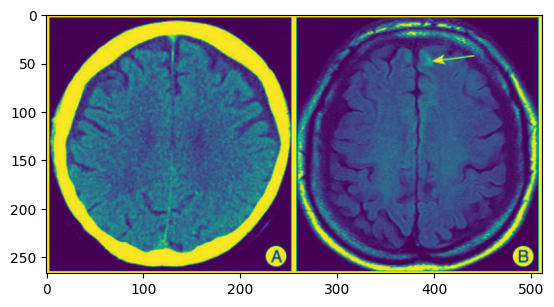

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

brain_path = "brain.png"
brain = Image.open(brain_path)
brain = np.array(brain)

plt.imshow(brain)


## **2. Get the shape and dtype of the image**
1. Print the shape (dimensions) of the image.
2. Print the `dtype` of the image array.

---



In [ ]:
print("Image shape:", brain.shape)
print("Image dtype:", brain.dtype)

Image shape: (267, 512)
Image dtype: uint8


## **3. Split the image**
The `brain.png` image contains two sub-images side-by-side: the left side and the right side.
1. Split the image into two separate images: **left image** and **right image**.  
   - Notice that the separation occurs in the middle of the image.
2. Display the left and right images using `matplotlib`.

---



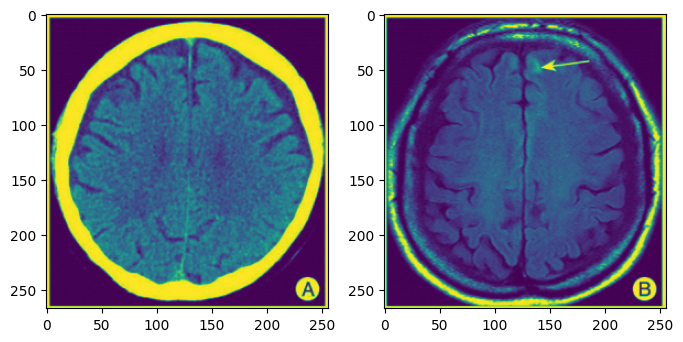

In [ ]:
left_brain = brain[:, :512//2]
right_brain = brain[:, 512//2:]

fig, axs = plt.subplots(1, 2, figsize = (8,4))
axs[0].imshow(left_brain)
axs[1].imshow(right_brain)

## **4. Analyze the right image**
1. Plot the **right image** using `plotly` to enable interactivity.
2. Use the mouse pointer on the plotly image to identify the intensity value of the tumor (the bright region in the image).

---



In [ ]:
import plotly.express as px
import numpy as np

px.imshow(right_brain, color_continuous_scale='gray')

## **5. Create a binary image**
1. Use the intensity value of the tumor found in the previous step.
2. Create a binary image that highlights only the tumor by setting pixel values below the tumor intensity to False (or 0) and to the tumor intensity to True (or 1).
3. Display the binary image using `matplotlib`.

---


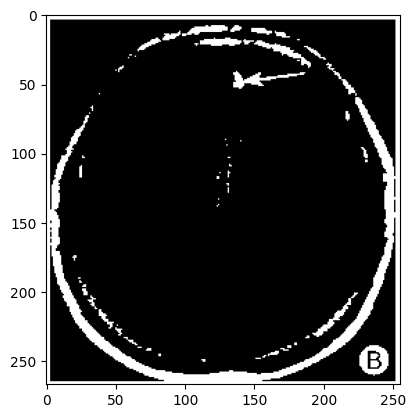

In [ ]:
plt.imshow(right_brain > 110, cmap = 'gray');

# **Camera Man**

## **1. Read the Camera Image from scikit-learn Library**

* Load the built-in "camera-man" image from the `sklearn.datasets` library.
* Display the loaded image using `imshow` from the `matplotlib` library.
* Test the shape of the image.
* Check the data type (`dtype`) of the image.



In [ ]:
from skimage import data # Libarary with examples of images

image_camera = data.camera() # Load example of an image

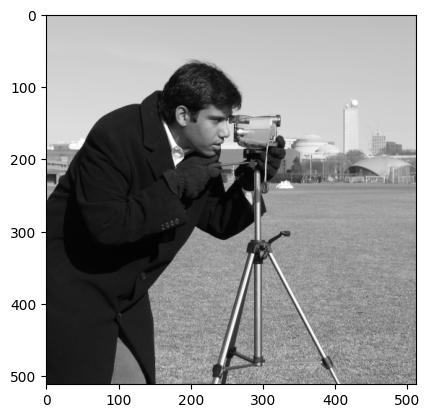

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image_camera, cmap = 'gray');

In [ ]:
print("Image shape:", image_camera.shape)
print("Image dtype:", image_camera.dtype)

Image shape: (512, 512)
Image dtype: uint8


## **2. Plot the image histogram**

* To create a histogram, which represents the distribution of pixel intensities, we first need to work with a 1D array of pixel values instead of a 2D image.
Convert the 2D image into a 1D array using the `flatten()` function, which is a built-in method of NumPy arrays.

* Use the 1D array you created earlier as input to the `matplotlib.pyplot.hist` function to generate the histogram plot. This will display the distribution of pixel intensities.

In [ ]:
image_flat = image_camera.flatten()
print("Image shape:", image_flat.shape)

Image shape: (262144,)


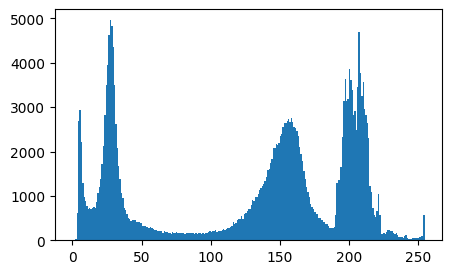

In [ ]:
plt.figure(figsize=(5,3))
plt.hist(image_flat, bins=255);

## **3. Make a binary plot**

Next you will need to split the pixel values into binary values.

* Analyze the histogram plot to identify a suitable threshold value, typically corresponding to the valley between two peaks.
* Convert the pixel values into binary (True or False) based on whether they are below or above the threshold.
* Use `imshow` to visualize the resulting binary image.

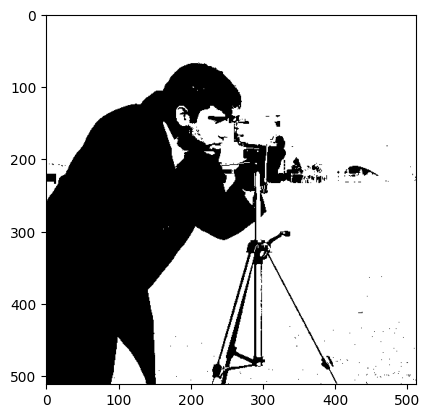

In [ ]:
binary_image = image_camera > 100
plt.imshow(binary_image, cmap='gray');

In [ ]:
from skimage.filters import threshold_otsu
threshold_otsu(image_camera)

102

# **RGB Image**

## **1. Load an RGB Image.**


* You can Download the Lena JPG image from the GitHub website, or select any RGB image from your computer.
* Display the loaded image using imshow from the matplotlib library.
* Test the shape of the image.
* Check the data type (dtype) of the image.

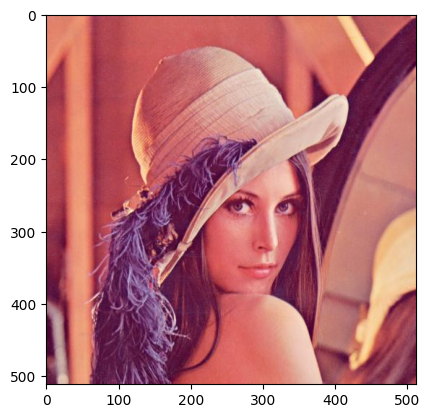

In [ ]:
from PIL import Image # To read images
import numpy as np # To convert image to NumPy array
import matplotlib.pyplot as plt # To plot the image

path_to_lena = 'lena.jpg'
image_lena = Image.open(path_to_lena)
image_lena = np.array(image_lena)

plt.imshow(image_lena) # imshow plot images

In [ ]:
print("Image shape:", image_lena.shape)
print("Image dtype:", image_lena.dtype)

Image shape: (512, 512, 3)
Image dtype: uint8


## **2. Grayscale Image**

* Convert the 3-channel color image array into a grayscale image with a single channel by averaging the values of the three color channels for each pixel.
You can use the `numpy.mean` function.
* Display the loaded image using imshow from the matplotlib library.
* Test the shape of the image.
* Check the data type (dtype) of the image.

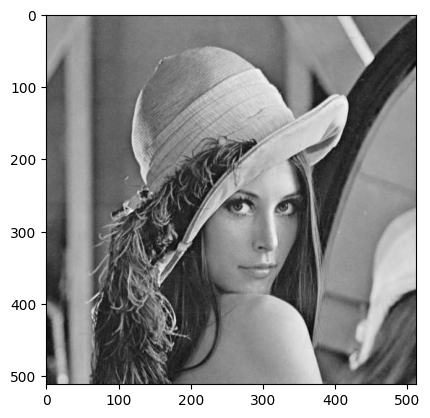

In [ ]:
gray_lena = np.mean(image_lena, axis=2)
plt.imshow(gray_lena, cmap='gray');

In [ ]:
print("Image shape:", gray_lena.shape)
print("Image dtype:", gray_lena.dtype)

Image shape: (512, 512)
Image dtype: float64


## **3. Convolve a Filter**

* Create a 3x3 filter with the following values:

   $$
   \text{filter} =
   \begin{bmatrix}
    0 & -1 & 0 \\
    -1 & 6 & -1 \\
    0 & -1 & 0
   \end{bmatrix}
   $$

   Represent this filter as a NumPy array.

* Ensure the filter values are normalized such that their sum equals 1.

* Use the `convolve2D` function from the `scipy.ndimage` library to apply the filter to the grayscale image.

* Display the resulting image to observe the effect of the filter.


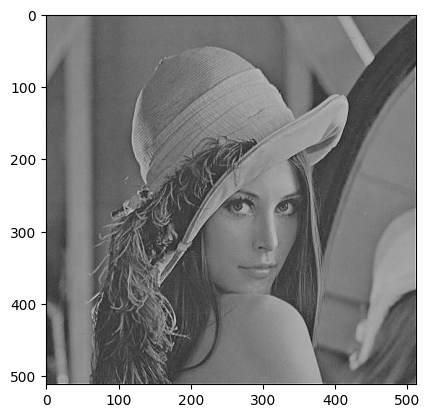

In [ ]:
from scipy.signal import convolve2d

filter = np.array([[0, -1, 0],
                   [-1, 6, -1],
                   [0, -1, 0]])
filter = filter / np.sum(filter)

filtered_image = convolve2d(gray_lena, filter, mode='same')
plt.imshow(filtered_image, cmap='gray');

## **4. Experiment with Additional Filters**

Try using the following filters and observe their effects on the image. Each filter serves a different purpose in image processing:

### 1. **Edge Detection Filter**  
   $$
   \text{filter} =
   \begin{bmatrix}
   -1 & -1 & -1 \\
   -1 &  8 & -1 \\
   -1 & -1 & -1
   \end{bmatrix}
   $$
   - **Purpose**: Highlights edges in the image by enhancing regions with high intensity variation.
   - **Effect**: Produces an image where the edges are emphasized, and flat areas appear dark.

### 2. **Sharpening Filter**  
   $$
   \text{filter} =
   \begin{bmatrix}
   0 & -1 & 0 \\
   -1 & 5 & -1 \\
   0 & -1 & 0
   \end{bmatrix}
   $$
   - **Purpose**: Increases the contrast of edges and fine details in the image.
   - **Effect**: Makes the image appear crisper and more defined.

### 3. **Gaussian Blur Filter**  
   $$
   \text{filter} =
   \begin{bmatrix}
   1 & 2 & 1 \\
   2 & 4 & 2 \\
   1 & 2 & 1
   \end{bmatrix}
   $$
   - **Purpose**: Smoothens the image by reducing noise and detail.
   - **Effect**: Produces a softly blurred image, ideal for preprocessing or reducing distractions.

### 4. **Box Blur Filter**  
   $$
   \text{filter} =
   \begin{bmatrix}
   1 & 1 & 1 \\
   1 & 1 & 1 \\
   1 & 1 & 1
   \end{bmatrix}
   $$
   - **Purpose**: Averages neighboring pixel values for a basic smoothing effect.
   - **Effect**: Creates a uniform blur across the image.

### 5. **Emboss Filter**  
   $$
   \text{filter} =
   \begin{bmatrix}
   -2 & -1 & 0 \\
   -1 & 1 & 1 \\
   0 & 1 & 2
   \end{bmatrix}
   $$
   - **Purpose**: Simulates a 3D effect by emphasizing the edges with a directional light source.
   - **Effect**: Produces an embossed effect, giving the image a sense of depth.

### Instructions:
- Experiment with each filter by applying it to the grayscale image using the `convolve2D` function.
- Observe and describe the visual changes introduced by each filter.
